In [266]:
import numpy as np
import matplotlib.pyplot as plt

In [316]:
names = r'$u-\bar{u}$', r'$d-\bar{d}$', r'$s-\bar{s}$', \
        r'$c-\bar{c}$', r'$b-\bar{b}$',\
        r'$g$', \
        r'$u+\bar{u}$', r'$d+\bar{d}$', r'$s+\bar{s}$',\
        r'$c+\bar{c}$', r'$b+\bar{b}$'
data0 = np.loadtxt("build/ic.dat").T
data = np.loadtxt("build/fs.dat").T
z = data[0]

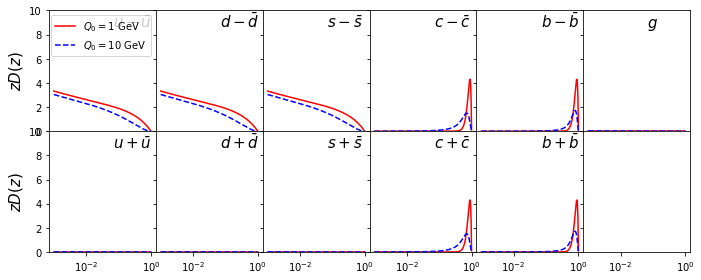

In [317]:
fig, axes = plt.subplots(2,6,figsize=(10,4), sharex=True, sharey=True)

for i, (it,ax) in enumerate(zip(names, axes.flatten()), start=1):
    ax.plot(z, data0[i], 'r-', label=r'$Q_0=1$ GeV')
    ax.plot(z, data[i], 'b--', label=r'$Q_0=10$ GeV')
    #ax.semilogy()
    ax.annotate(it, xy=(.6,.86), xycoords="axes fraction", fontsize=15)
    if ax.is_first_col():
        ax.set_ylabel(r"$zD(z)$", fontsize=15)
    if ax.is_last_col():
        ax.set_xlabel(r"$z$", fontsize=15)
axes[0,0].legend()
#ax.set_xlim(0,1)
ax.set_xticks([0,.2,.4,.6,.8])
ax.set_ylim(0,10)
ax.semilogx()
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

In [324]:
Q2, z, fc = np.loadtxt("build/channel.dat").T

[]

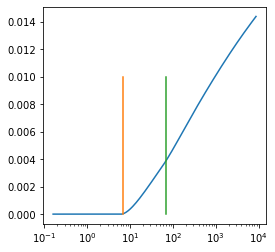

In [333]:
fig, ax = plt.subplots(1,1,figsize=(4,4), sharex=True, sharey=True)
ax.plot(Q2, fc)
ax.plot([4*1.3**2]*2, [0,.01])
ax.plot([4*4.2**2]*2, [0,.01])
#ax.set_xlim(0,120)
ax.semilogx()